In [128]:
#-----------------------------------------------------------------------
# 2nd_price_grandbundle.py
# Author: Rebecca Barber
# 
# 2nd price auction on grand bundle (2 items)
#-----------------------------------------------------------------------

import scipy.stats as st
from statistics import *
import matplotlib.pyplot as plt
from sys import argv
import numpy as np
from math import *
import pandas as pd
from plotnine import *
from random import * 

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Useful Functions

In [5]:
# draws value from ER curve
def er_draw():
	q = random()
	return 1/(1-q)

# draws m values from the ER curve
def draw_vals(m):
	vals = []
	for i in range(m):
		draw = er_draw()
		vals.append(draw)
	return vals

## Auction Revenue

In [76]:
# generates revenue for 2nd price auction of grand bundle
# given n bidders and m items
# truncated at value T
def auction_rev(n, m, T):

	# for each bidder, stores their value of the grand bundle
	bidder_bundle_vals = []

	# for each bidder, draw values for each item
	for i in range(n):
		bundle_val = sum(draw_vals(m))
		bidder_bundle_vals.append(bundle_val)

	# sort the array
	bidder_bundle_vals = sorted(bidder_bundle_vals, reverse = True)
	rev = float(bidder_bundle_vals[1])

    # truncate the second highest value at T
    # check that this is right?
	truncated_rev = float(min(T, rev))
	return rev, truncated_rev

## Some auction rev testing
Note that when $n = 100,$ $trials = 300,000,$ $T = 16n^2$, we don't truncate **any** revs <br>
This means we should hardly ever be truncating <br>
(we also checked that truncating works though, w/ smaller $n=20$)

In [56]:
n = 100
m = 2
T = 16 * np.power(n, 2)
trials = 300000

test_revs = []
test_trevs = []
test_truncated_trials = []

print('trial', end = '')
for i in range(trials):
    if i % 10000 == 0: print('   ', i, end = '')
    rev, trev = auction_rev(n,m,T)
    test_revs.append(rev)
    test_trevs.append(trev)
    if rev != trev: test_truncated_trials.append(i)
#     print('trial', i, 'rev:', rev)
#     print('trial', i, 'trev:', truncated_rev)
#     print('\n')

print('\n')
print(test_truncated_trials)

trial 0
trial 10000
trial 20000
trial 30000
trial 40000
trial 50000
trial 60000
trial 70000
trial 80000
trial 90000
trial 100000
trial 110000
trial 120000
trial 130000
trial 140000
trial 150000
trial 160000
trial 170000
trial 180000
trial 190000
trial 200000
trial 210000
trial 220000
trial 230000
trial 240000
trial 250000
trial 260000
trial 270000
trial 280000
trial 290000
[265246]


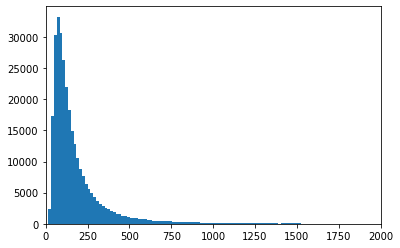

In [55]:
# graph the revs
num_bins = 4000
plt.hist(revs, num_bins)
plt.xlim(0,2000)
plt.show()

## Variable Updates

In [153]:
num_trials = 10000
min_bidders = 100
max_bidders = 1000
bidder_step = 5
num_items = 2

num_bidders = []
for i in range(min_bidders, max_bidders+1, bidder_step):
    num_bidders.append(i)
print(num_bidders)

[100, 105, 110, 115, 120, 125, 130, 135, 140, 145, 150, 155, 160, 165, 170, 175, 180, 185, 190, 195, 200, 205, 210, 215, 220, 225, 230, 235, 240, 245, 250, 255, 260, 265, 270, 275, 280, 285, 290, 295, 300, 305, 310, 315, 320, 325, 330, 335, 340, 345, 350, 355, 360, 365, 370, 375, 380, 385, 390, 395, 400, 405, 410, 415, 420, 425, 430, 435, 440, 445, 450, 455, 460, 465, 470, 475, 480, 485, 490, 495, 500, 505, 510, 515, 520, 525, 530, 535, 540, 545, 550, 555, 560, 565, 570, 575, 580, 585, 590, 595, 600, 605, 610, 615, 620, 625, 630, 635, 640, 645, 650, 655, 660, 665, 670, 675, 680, 685, 690, 695, 700, 705, 710, 715, 720, 725, 730, 735, 740, 745, 750, 755, 760, 765, 770, 775, 780, 785, 790, 795, 800, 805, 810, 815, 820, 825, 830, 835, 840, 845, 850, 855, 860, 865, 870, 875, 880, 885, 890, 895, 900, 905, 910, 915, 920, 925, 930, 935, 940, 945, 950, 955, 960, 965, 970, 975, 980, 985, 990, 995, 1000]


## Main Code

In [154]:
avg_revs = []
avg_trevs = []
truncated_trial_count = []

print('number of bidders:', end = '')
for n in range(min_bidders, max_bidders+1, bidder_step):
    print('  ', n, end = '')

    # run num_trials for each # of bidders so we can 
    # take the average
    all_revs = []
    all_trevs = []
    
    T = 16 * np.power(n, 2)
    truncated_trials = []
    
    for i in range(num_trials):
        rev, trev = auction_rev(n, num_items, T)
        all_revs.append(rev)
        all_trevs.append(trev)
        if rev != trev: truncated_trials.append(i)
            
    avg_revs.append(mean(all_revs))
    avg_trevs.append(mean(all_trevs))
    truncated_trial_count.append(len(truncated_trials))

# save all of the data
csv_file = './data/2nd_price_' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders_' + str(bidder_step) + 'step_' + \
    str(num_trials) + 'trials.csv'

df = pd.DataFrame(columns=['num bidders', 'avg rev', 'avg trev', 'truncated?'])
for i in range(len(num_bidders)):
    n = num_bidders[i]
    avg_rev = avg_revs[i]
    avg_trev = avg_trevs[i]
    if avg_rev == avg_trev: truncated_bool = ''
    else: truncated_bool = 'x'
    df = df.append({'num bidders': n, 'avg rev': avg_rev, 
        'avg trev': avg_trev, 'truncated?': truncated_bool}, ignore_index=True)

df.to_csv(csv_file)

number of bidders:   100   105   110   115   120   125   130   135   140   145   150   155   160   165   170   175   180   185   190   195   200   205   210   215   220   225   230   235   240   245   250   255   260   265   270   275   280   285   290   295   300   305   310   315   320   325   330   335   340   345   350   355   360   365   370   375   380   385   390   395   400   405   410   415   420   425   430   435   440   445   450   455   460   465   470   475   480   485   490   495   500   505   510   515   520   525   530   535   540   545   550   555   560   565   570   575   580   585   590   595   600   605   610   615   620   625   630   635   640   645   650   655   660   665   670   675   680   685   690   695   700   705   710   715   720   725   730   735   740   745   750   755   760   765   770   775   780   785   790   795   800   805   810   815   820   825   830   835   840   845   850   855   860   865   870   875   880   885   890   895   900   905   910   9

## Plotting

In [155]:
# make dataframe for plotting
rev_df_all = pd.DataFrame(columns=['num bidders', 'avg trev', 'Legend'])
for i in range(len(num_bidders)):
    n = num_bidders[i]
    avg_trev = avg_trevs[i]

    # benchmarks - note that this only works for m = 2
    sqrt_benchmark = sqrt(2 * n) / 7
    log_benchmark = np.log(n) / 10
    
    # adjust rev to get rid of mn factor
    adj_avg_trev = avg_trev - num_items * n

    rev_df_all = rev_df_all.append({'num bidders': n, 'avg trev': adj_avg_trev, 'Legend': 'Simulation'}, 
            ignore_index=True)
    rev_df_all = rev_df_all.append({'num bidders': n, 'avg trev': sqrt_benchmark, 'Legend': 'sqrt(2n) / 7'}, 
            ignore_index=True)
    rev_df_all = rev_df_all.append({'num bidders': n, 'avg trev': log_benchmark, 'Legend': 'ln(n) / 10'}, 
            ignore_index=True)

In [156]:
# x labels
x_breaks = []
x_jumps = int((max_bidders - min_bidders) / 10)
for x in range(min_bidders, max_bidders+1, x_jumps): x_breaks.append(x)

# make the graph
plt1 = ggplot(aes(x='num bidders', y = 'avg trev', color = 'Legend', group = 'Legend'), data=rev_df_all) + \
    geom_line() +\
    theme(axis_text_x = element_text(color = 'black'), axis_text_y = element_text(color = 'black')) + \
    labs(x="Number of Bidders", y="Average TRev", title = "Second Price Auction on Grand Bundle (m = 2)") + \
    scale_x_discrete(breaks=x_breaks)

figure_name = './figures/2nd_price_' + str(min_bidders) + 'to' + \
    str(max_bidders) + 'bidders_' + str(bidder_step) + 'step_' + \
    str(num_trials) + 'trials.png'

ggsave(filename=figure_name,
   plot=plt1,
   device='png', dpi = 200)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotnine/ggplot.py:729: PlotnineWarning: Saving 6.4 x 4.8 in image.
  from_inches(height, units), units), PlotnineWarning)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/plotnine/ggplot.py:730: PlotnineWarning: Filename: ./figures/2nd_price_100to1000bidders_5step_10000trials.png
  warn('Filename: {}'.format(filename), PlotnineWarning)


## Find lines of best fit
log and sqrt

In [157]:
# just look at revenue -- not at the other benchmarks
rev_df = rev_df_all.loc[rev_df_all['Legend'] == 'Simulation']
rev_df = rev_df.drop('Legend', 1)

num_bidders = list(rev_df['num bidders'])
revs = list(rev_df['avg trev'])

# For fitting y = A + B log x, just fit y against (log x)
# For fitting y = A + B sqrt n, just fit y against (sqrt x)
# https://stackoverflow.com/questions/3433486/how-to-do-
# exponential-and-logarithmic-curve-fitting-in-python-i-found-only-poly
log_fit = np.polyfit(np.log(num_bidders), revs, 1)
sqrt_fit = np.polyfit(np.sqrt(num_bidders), revs, 1)

# calculate errors
log_error = np.sum((np.polyval(log_fit, num_bidders) - revs)**2)
sqrt_error = np.sum((np.polyval(sqrt_fit, num_bidders) - revs)**2)
log_error
sqrt_error

# plot
# log_trend = np.poly1d(log_fit) 
# sqrt_trend = np.poly1d(sqrt_fit) 
# plt.plot(num_bidders,revs)
# plt.plot(num_bidders, log_trend(num_bidders))
# plt.plot(num_bidders, sqrt_trend(num_bidders))

172767004.68731108

1198330.626817869